#  Mall Customers Dataset

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the Spending score of all customers. We have to segment these customers based on the details given. So we will be making clusters of cutomers using two techniques - 

K-Means Clustering

Hierarchical Clustering

In [2]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the dataset
data=pd.read_csv("./data/Mall_Customers/Mall_Customers.csv")

Data Analysis : 

In [7]:
# displaying first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# (no. of rows, no. of columns)
data.shape

(200, 5)

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# finding any null values in data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Finding the number of males and females in the data
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

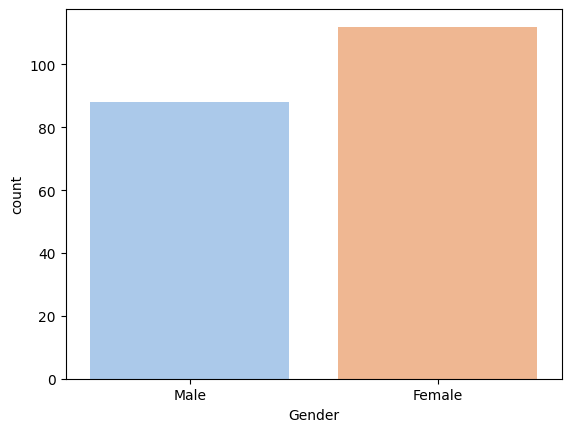

In [12]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=data,palette="pastel")
plt.show()

The number of females customers is more than the number of male customers

In [13]:
# Computing minimum and maximum age of customers
print(min(data.Age))
print(max(data.Age))

18
70


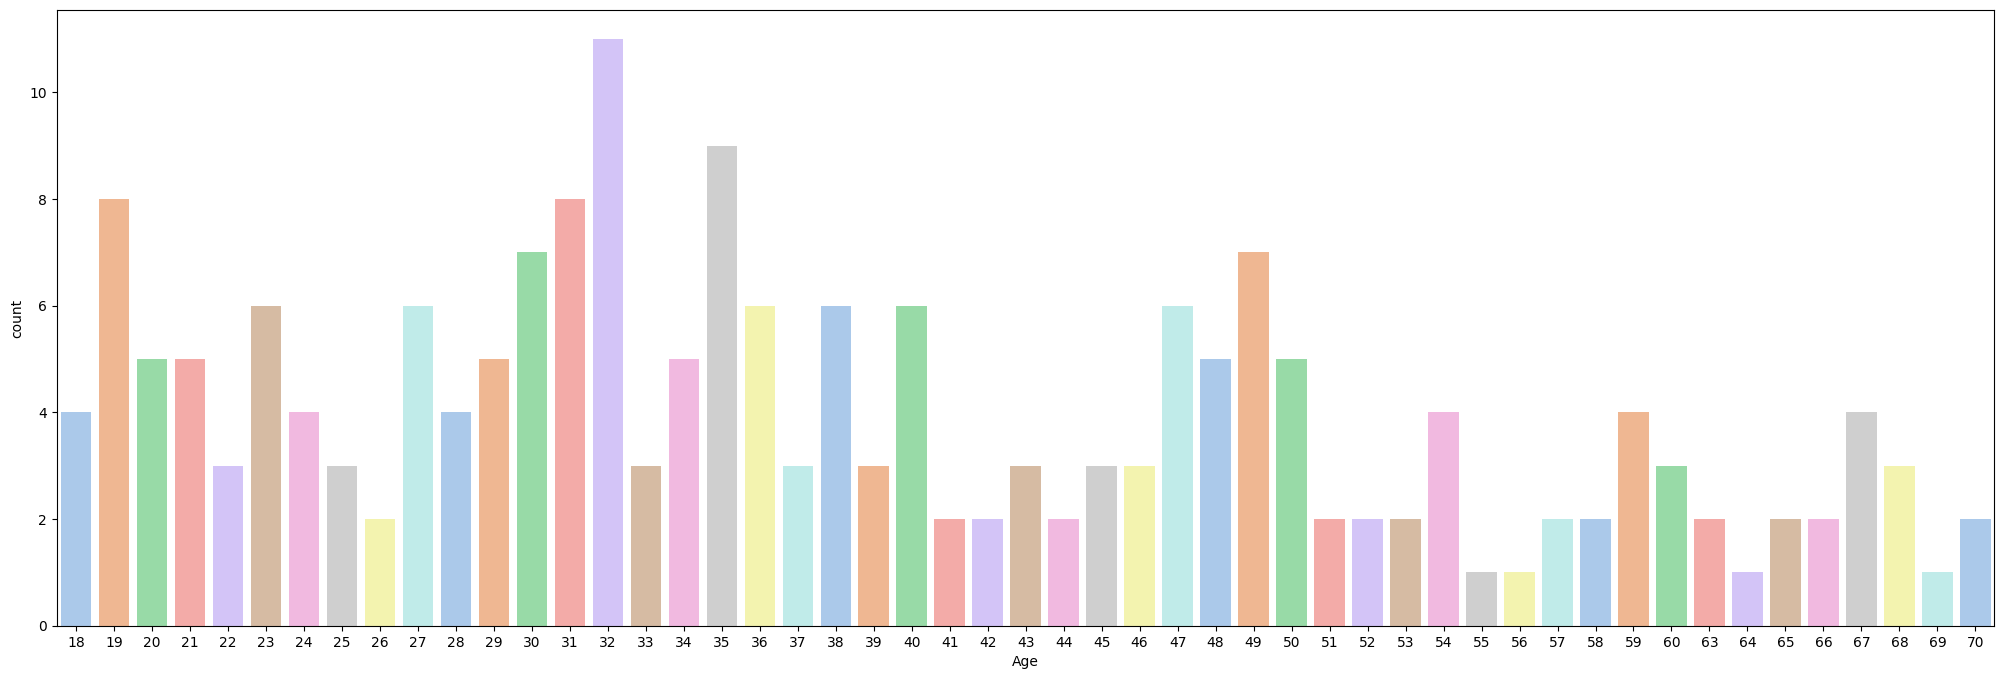

In [14]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=data,palette="pastel")
plt.show()

Customers with age 32 make for the largest number of customers.

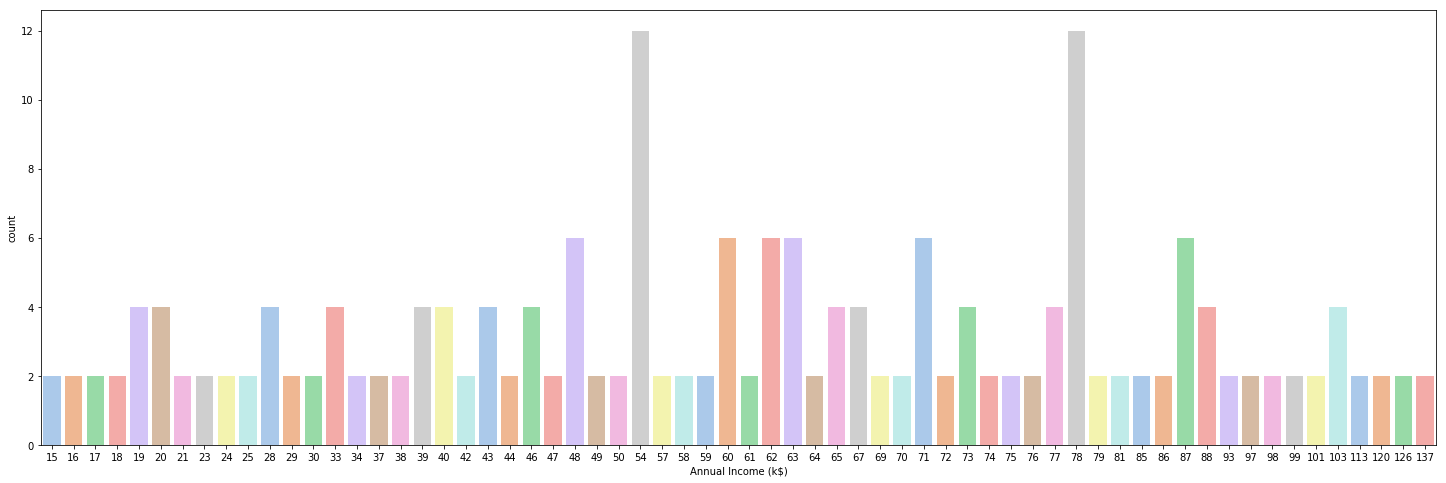

In [11]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="pastel")
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers.

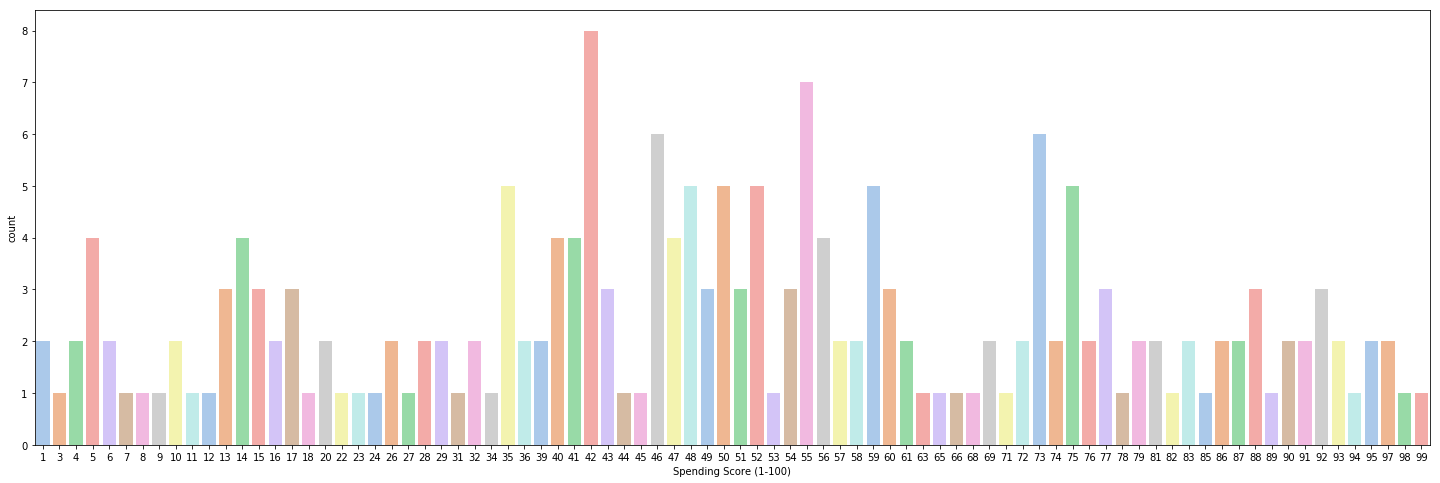

In [12]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=data,palette="pastel")
plt.show()

The maximum spending score is 42.

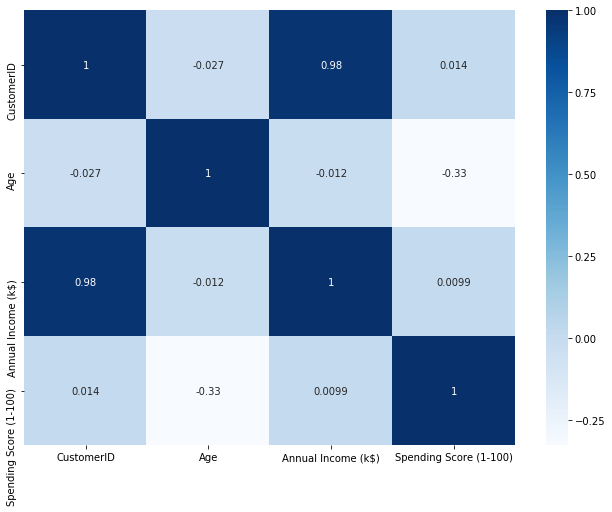

In [13]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

# K-Means Clustering

Making clusters based on Annual income and Spending Score.

In [15]:
# Taking annual income and spending score in x to make clusters
x=data.iloc[:,[3,4]]

In [16]:
# displaying first 5 rows of x
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Elbow Method : 

In [17]:
# Using elbow method to find the optimal number of clusters.
from sklearn.cluster import KMeans

In [18]:
# WCSS is Within Cluster Sum of Squares
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Visualising elbow method
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

So the optimal number of clusters = 5

Applying K-Means :

In [20]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [21]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans
# it tells which data point belongs to which cluster (0,1,2,3,4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [22]:
y_kmeans.astype

<function ndarray.astype>

In [23]:
# converting x into ndarray to avoid errors
x=np.array(x)

In [24]:
x.astype

<function ndarray.astype>

In [41]:
x[y_kmeans==0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

Visualising the cluster :

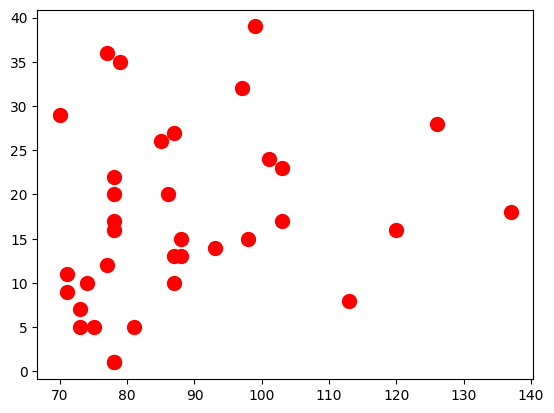

In [36]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

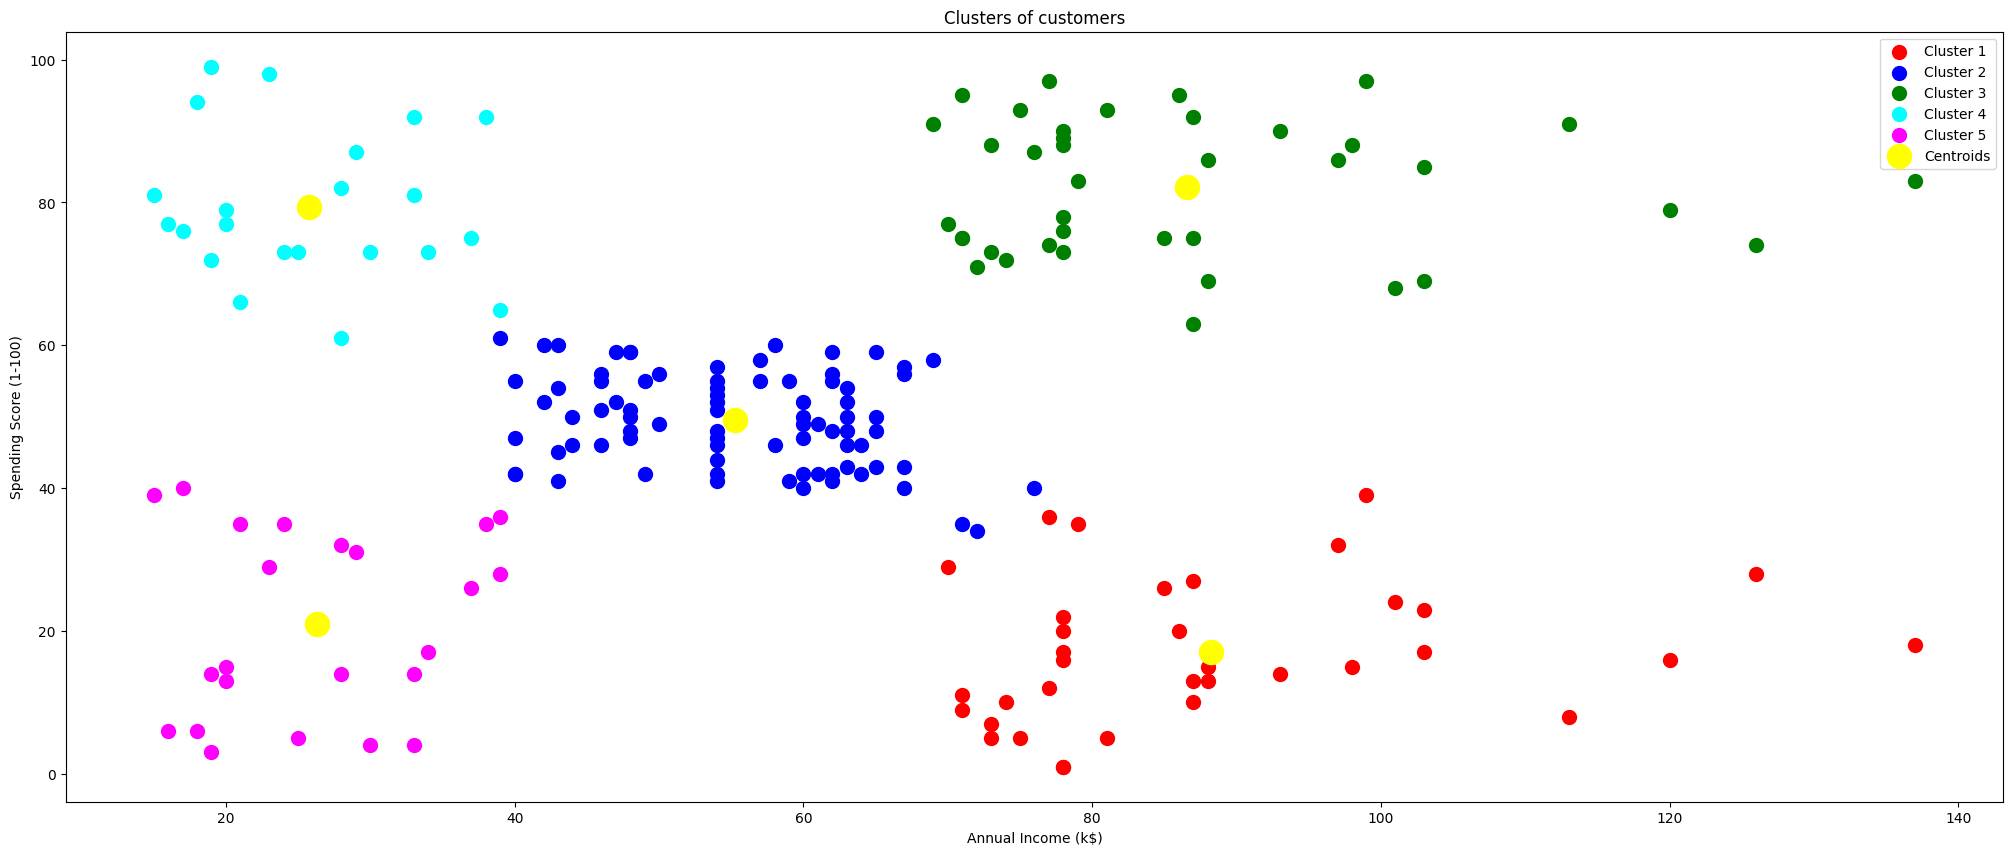

In [25]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1 contains customers with high annual income but low spending score.

Cluster 2 contains customers with average annual income and average spending score.

Cluster 3 contains customers with high annual income and high spending score.

Cluster 4 contains customers with low annual income but high spending score.

Cluster 5 contains customers with low annual income and low spending score.

# Hierarchial Clustering

Dendrogram : It is a plot between Euclidean distance (y-axis) and data points (x-axis)

In [26]:
import scipy.cluster.hierarchy as sch

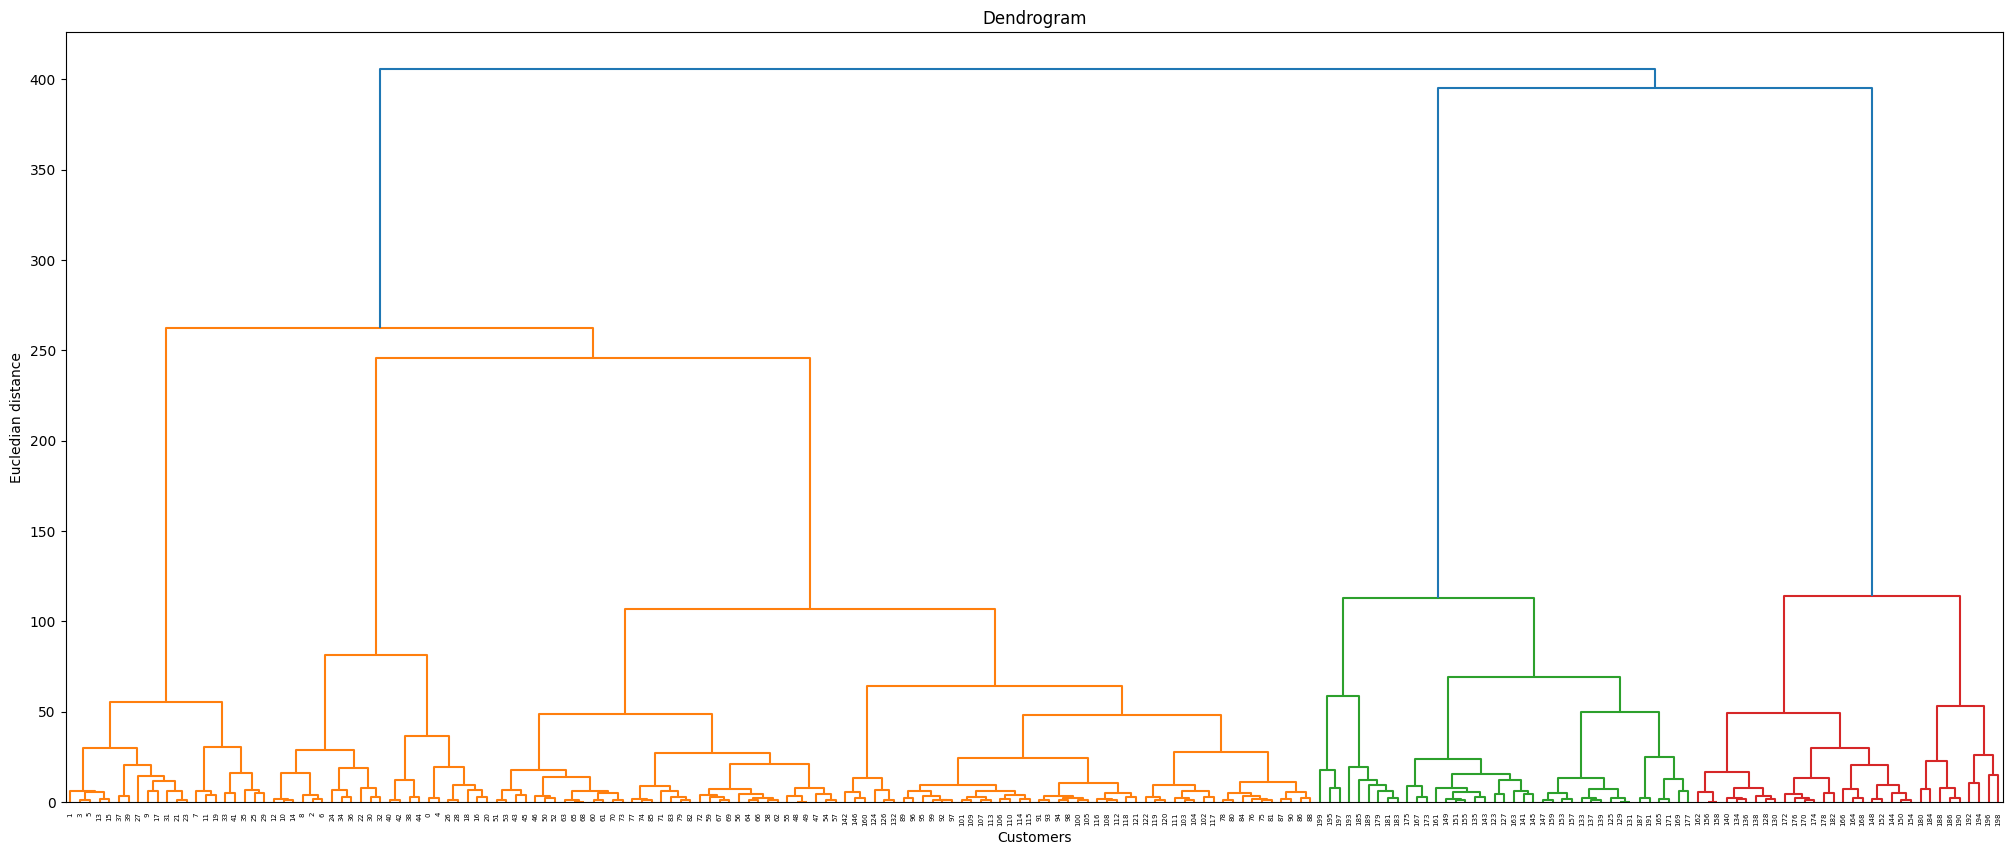

In [27]:
# Visualising the dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

So the optimal number of custers  = 5

Applying Agglomerative Hierarchical Clustering : 

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
# creating object hc of class AgglomerativeClustering()
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

In [30]:
# it gives an array which tells as to which data point belongs to which cluster (0,1,2,3,4)
y_hc=hc.fit_predict(x)

In [31]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [32]:
y_hc.astype

<function ndarray.astype>

In [33]:
# converting x into ndarray to avoid errors
x=np.array(x)

In [34]:
x.astype

<function ndarray.astype>

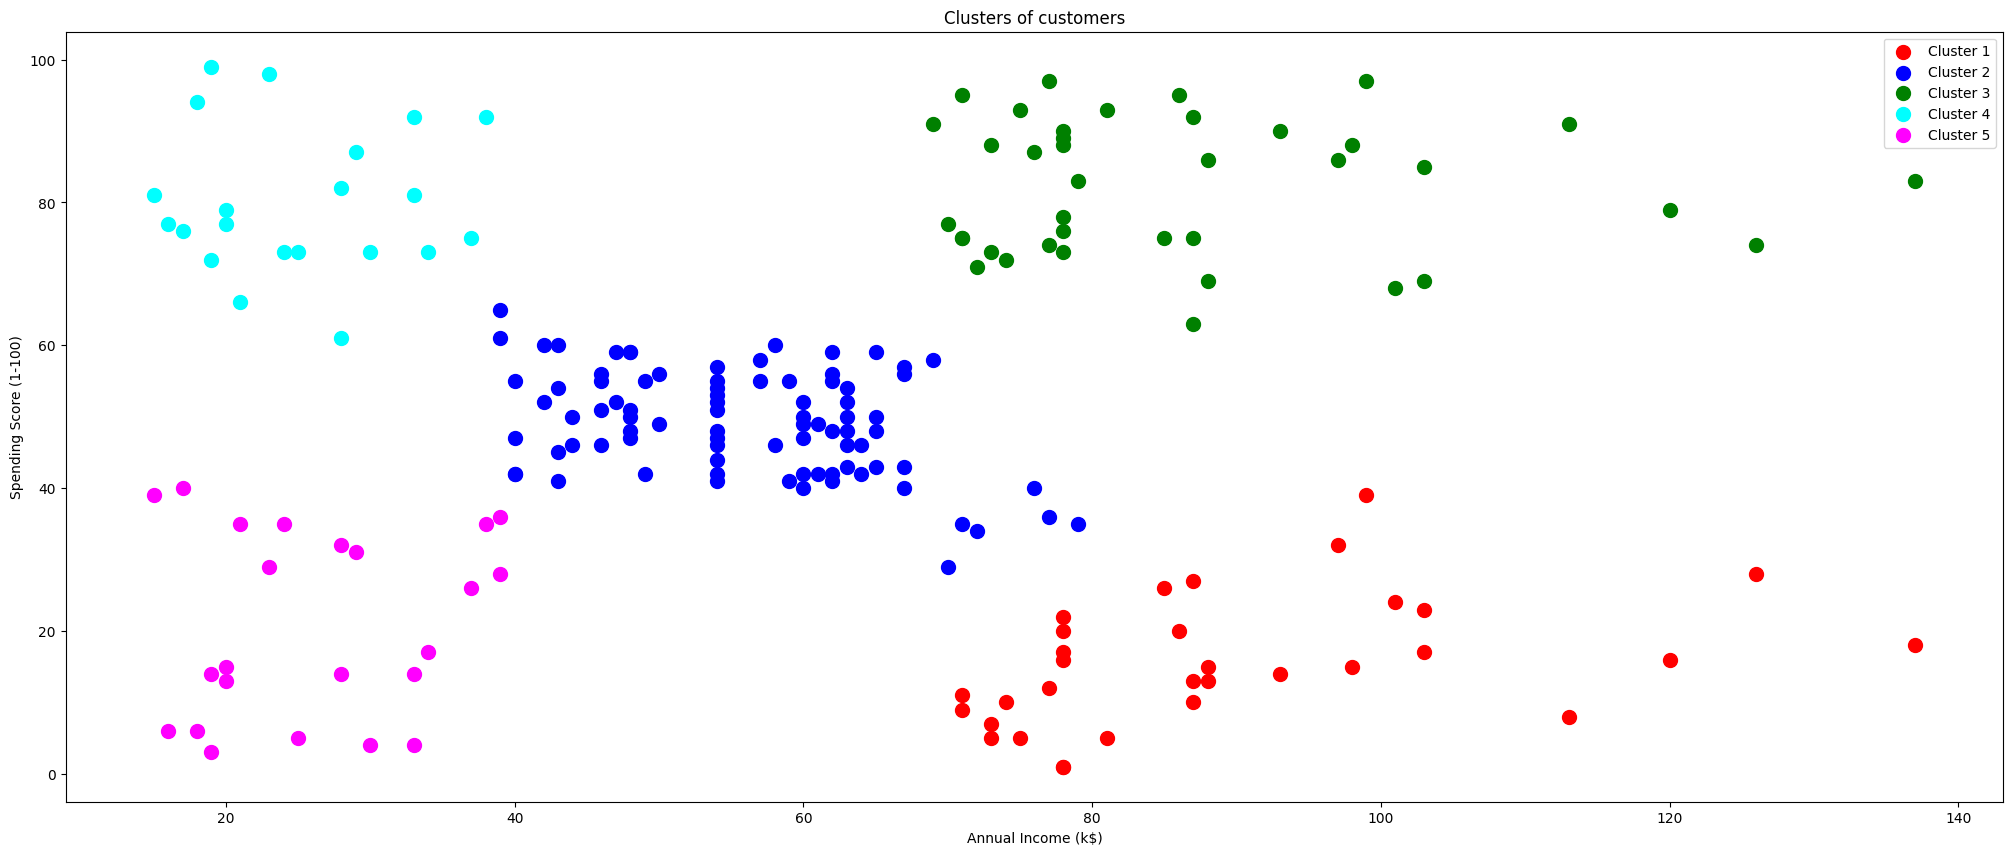

In [35]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()